In [1]:
import os # accessing directory structure
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline

In [47]:
# import libraries
from nltk.tokenize import word_tokenize , sent_tokenize
from sklearn.pipeline import Pipeline , FeatureUnion
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier ,BaggingClassifier ,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,  GridSearchCV 
from sklearn.metrics import classification_report ,confusion_matrix , accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import pickle
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import os # accessing directory structure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '6-class-data',
 'Compare between datasets',
 'Emotion Detection from Text.zip',
 'emotion-labels-test.csv',
 'emotion-labels-train.csv',
 'emotion-labels-val.csv',
 'Emotion_Classification_4_classes.ipynb',
 'emotion_detection_4classes-DL.ipynb',
 'emotion_detection_4classes.ipynb',
 'emotion_detection_5classes.ipynb',
 'emotion_detection_5classes_2nd.ipynb',
 'New_version_emotion_FAIL.ipynb',
 'text_emotion.csv',
 'text_emotion.csv.zip',
 'tweet_emotions.csv']

In [5]:
!pwd

C:\Users\Ahmad Abd Elhameed\emotion detection study


In [6]:
test_data = pd.read_csv("emotion-labels-test.csv")
train_data = pd.read_csv("emotion-labels-train.csv")
validation_data = pd.read_csv("emotion-labels-val.csv")

In [7]:
test_data.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [8]:
test_data.shape

(3142, 2)

In [9]:
test_data.label.unique()

array(['joy', 'fear', 'anger', 'sadness'], dtype=object)

In [10]:
train_data.label.value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [11]:
print("Train : ", train_data.shape)
print("Test : ", test_data.shape)
print("Validation : ", validation_data.shape)

Train :  (3613, 2)
Test :  (3142, 2)
Validation :  (347, 2)


## Data Understanding
describe_data function will help us understand each dataset

In [12]:
def describe_data(data_type,data,label):
    print(data_type," DESCRIPTION")
    print("--------------------------")
    size=data.shape
    null_values=data.isnull().sum().sum()
    
    label_count=data[label].value_counts()
    print(data_type," shape:",size,"\n")
    print(data_type," contains:",null_values," null values\n")
    print("Label counts:")  
    print(label_count)
    print()
    
    print("*****",data_type," label count plot ****")
    sns.countplot(
        data=data,
        x=label
    )

Training Data  DESCRIPTION
--------------------------
Training Data  shape: (3613, 2) 

Training Data  contains: 0  null values

Label counts:
fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

***** Training Data  label count plot ****


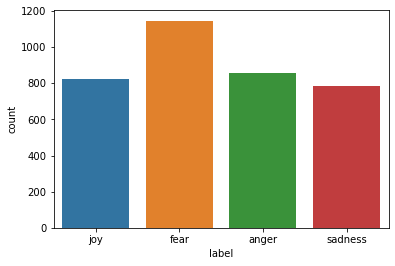

In [13]:
describe_data("Training Data",train_data,"label")

Testing Data  DESCRIPTION
--------------------------
Testing Data  shape: (3142, 2) 

Testing Data  contains: 0  null values

Label counts:
fear       995
anger      760
joy        714
sadness    673
Name: label, dtype: int64

***** Testing Data  label count plot ****


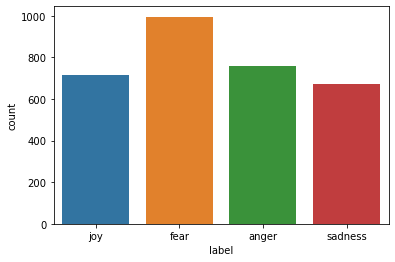

In [14]:
describe_data("Testing Data",test_data,"label")

Validation Data  DESCRIPTION
--------------------------
Validation Data  shape: (347, 2) 

Validation Data  contains: 0  null values

Label counts:
fear       110
anger       84
joy         79
sadness     74
Name: label, dtype: int64

***** Validation Data  label count plot ****


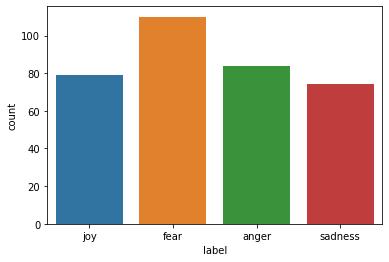

In [15]:
describe_data("Validation Data",validation_data,"label")

In [16]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    347 non-null    object
 1   label   347 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [17]:
def label_encode(data,label):
    labels=data[label].map(
    {
        "joy":0,
        "fear":1,
        "anger":2,
        "sadness":3
    }
    )
    return labels

In [18]:
train_data["Label"]=label_encode(train_data,"label")
validation_data["Label"]=label_encode(validation_data,"label")
test_data["Label"]=label_encode(test_data,"label")

In [19]:
train_data.head()

,text,label,Label
0,Just got back from seeing @GaryDelaney in Burs...,joy,0
1,Oh dear an evening of absolute hilarity I don'...,joy,0
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0
4,I feel so blessed to work with the family that...,joy,0


In [20]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(train_data.Label.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = [str(int(i)) for i in range(train_data["Label"].nunique())]) 
df = pd.concat([train_data, dfOneHot], axis=1)
#printing to verify 
print(df.head())

                                                text label  Label    0    1  \
0  Just got back from seeing @GaryDelaney in Burs...   joy      0  1.0  0.0   
1  Oh dear an evening of absolute hilarity I don'...   joy      0  1.0  0.0   
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy      0  1.0  0.0   
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy      0  1.0  0.0   
4  I feel so blessed to work with the family that...   joy      0  1.0  0.0   

     2    3  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  


In [21]:
df.rename(columns={'0': 'joy', '1': 'fear',"2":"anger","3":"sadness"}, inplace=True)

In [22]:
df.head()

,text,label,Label,joy,fear,anger,sadness
0,Just got back from seeing @GaryDelaney in Burs...,joy,0,1.0,0.0,0.0,0.0
1,Oh dear an evening of absolute hilarity I don'...,joy,0,1.0,0.0,0.0,0.0
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0,1.0,0.0,0.0,0.0
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0,1.0,0.0,0.0,0.0
4,I feel so blessed to work with the family that...,joy,0,1.0,0.0,0.0,0.0


In [23]:
df2 = df[["joy","fear","anger","sadness"]].astype(int)

In [24]:
df2.head()

,joy,fear,anger,sadness
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [25]:
df3 = pd.concat([df["text"], df2], axis=1)

In [26]:
df3.head()

,text,joy,fear,anger,sadness
0,Just got back from seeing @GaryDelaney in Burs...,1,0,0,0
1,Oh dear an evening of absolute hilarity I don'...,1,0,0,0
2,Been waiting all week for this game ❤️❤️❤️ #ch...,1,0,0,0
3,"@gardiner_love : Thank you so much, Gloria! Yo...",1,0,0,0
4,I feel so blessed to work with the family that...,1,0,0,0


In [27]:
test_data.head()

,text,label,Label
0,You must be knowing #blithe means (adj.) Happ...,joy,0
1,Old saying 'A #smile shared is one gained for ...,joy,0
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy,0
3,@Elaminova sparkling water makes your life spa...,joy,0
4,I'm tired of everybody telling me to chill out...,joy,0


In [28]:
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(test_data.Label.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = [str(int(i)) for i in range(test_data["Label"].nunique())]) 
df_test = pd.concat([test_data, dfOneHot], axis=1)
#printing to verify 
df_test.head()

,text,label,Label,0,1,2,3
0,You must be knowing #blithe means (adj.) Happ...,joy,0,1.0,0.0,0.0,0.0
1,Old saying 'A #smile shared is one gained for ...,joy,0,1.0,0.0,0.0,0.0
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy,0,1.0,0.0,0.0,0.0
3,@Elaminova sparkling water makes your life spa...,joy,0,1.0,0.0,0.0,0.0
4,I'm tired of everybody telling me to chill out...,joy,0,1.0,0.0,0.0,0.0


In [29]:
df_test.drop(['label',"Label"],axis=1,inplace=True)

In [30]:
df_test.rename(columns={'0': 'joy', '1': 'fear',"2":"anger","3":"sadness"}, inplace=True)

In [31]:
df_test1 = df_test[["joy","fear","anger","sadness"]].astype(int)

In [32]:
df_test1.head()

,joy,fear,anger,sadness
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [33]:
df_test2 = pd.concat([df_test["text"], df_test1], axis=1)

In [34]:
df_test2.head()

,text,joy,fear,anger,sadness
0,You must be knowing #blithe means (adj.) Happ...,1,0,0,0
1,Old saying 'A #smile shared is one gained for ...,1,0,0,0
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,1,0,0,0
3,@Elaminova sparkling water makes your life spa...,1,0,0,0
4,I'm tired of everybody telling me to chill out...,1,0,0,0


In [35]:
validation_data.head()

,text,label,Label
0,"@theclobra lol I thought maybe, couldn't decid...",joy,0
1,Nawaz Sharif is getting more funnier than @kap...,joy,0
2,Nawaz Sharif is getting more funnier than @kap...,joy,0
3,@tomderivan73 😁...I'll just people watch and e...,joy,0
4,I love my family so much #lucky #grateful #sma...,joy,0


In [39]:
lemmatizer = WordNetLemmatizer()

## DEEP LEARNING

In [41]:
X_train = X
y_train = y
X_test = df_test2["text"]
y_test = df_test2[['joy','fear',"anger","sadness"]]
X_val = df_val2["text"]
y_val = df_val2[['joy','fear',"anger","sadness"]]

In [42]:
print ("X_train shape = ",X_train.shape)
print ("y_train shape = ",y_train.shape)
print ("X_test shape = ",X_test.shape)
print ("y_test shape = ",y_test.shape)
print ("X_val shape = ",X_val.shape)
print ("y_val shape = ",y_val.shape)

X_train shape =  (3613,)
y_train shape =  (3613, 4)
X_test shape =  (3142,)
y_test shape =  (3142, 4)
X_val shape =  (347,)
y_val shape =  (347, 4)


In [43]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [48]:
train_data.head()

,text,label,Label
0,Just got back from seeing @GaryDelaney in Burs...,joy,0
1,Oh dear an evening of absolute hilarity I don'...,joy,0
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0
4,I feel so blessed to work with the family that...,joy,0


In [49]:
test_data.head()

,text,label,Label
0,You must be knowing #blithe means (adj.) Happ...,joy,0
1,Old saying 'A #smile shared is one gained for ...,joy,0
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy,0
3,@Elaminova sparkling water makes your life spa...,joy,0
4,I'm tired of everybody telling me to chill out...,joy,0


In [50]:
validation_data.head()

,text,label,Label
0,"@theclobra lol I thought maybe, couldn't decid...",joy,0
1,Nawaz Sharif is getting more funnier than @kap...,joy,0
2,Nawaz Sharif is getting more funnier than @kap...,joy,0
3,@tomderivan73 😁...I'll just people watch and e...,joy,0
4,I love my family so much #lucky #grateful #sma...,joy,0


In [55]:
vocab_size = 10000
len_sentence = 160

In [52]:
train_data["length"] = [len(i) for i in train_data["text"]]

In [54]:
print(train_data["length"].max())
print(train_data["length"].min())

160
7


In [58]:
train_data.head()

,text,label,Label,length
0,Just got back from seeing @GaryDelaney in Burs...,joy,0,110
1,Oh dear an evening of absolute hilarity I don'...,joy,0,94
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0,60
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0,129
4,I feel so blessed to work with the family that...,joy,0,114


<AxesSubplot:xlabel='length', ylabel='Density'>

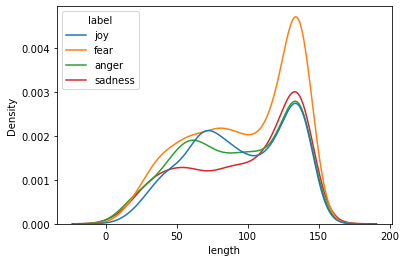

In [59]:
sns.kdeplot(x=train_data["length"], hue=train_data["label"])

In [60]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
def text_preprocess(data, column):
    print(data.shape)
    lemmatizer = WordNetLemmatizer()
    corpus = []
    
    for text in data[column]:
        text = re.sub("[^a-zA-Z0-9]", " ", text)
        
        text = text.lower()
        text = text.split()
        
        text = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(text)
        
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    embeddec_doc = pad_sequences(sequences=one_hot_word,
                              maxlen=len_sentence,
                              padding="pre")
    print(data.shape)
    return embeddec_doc

In [61]:
x_train=text_preprocess(train_data, "text")

(3613, 4)
(3613, 4)


In [62]:
x_test=text_preprocess(test_data, "text")

(3142, 3)
(3142, 3)


In [63]:
x_validate=text_preprocess(validation_data, "text")

(347, 3)
(347, 3)


In [64]:
x_train.shape

(3613, 160)

In [66]:
x_train[154]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [67]:
y_train=train_data["label"]
y_validate=validation_data["label"]
y_test=test_data["label"]

In [68]:
encoder = OneHotEncoder()
y_train = np.array(y_train)
y_train = encoder.fit_transform(y_train.reshape(-1,1)).toarray()

In [69]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [70]:
y_test = np.array(y_test)
y_validate = np.array(y_validate)

y_test = encoder.fit_transform(y_test.reshape(-1,1)).toarray()
y_validate = encoder.fit_transform(y_validate.reshape(-1,1)).toarray()

In [71]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [72]:
y_validate

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [79]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=160, input_length=len_sentence))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 160, 160)          1600000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 160, 160)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               147968    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                

In [81]:
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [82]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
check_point = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [83]:
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_validate, y_validate),verbose = 1, callbacks= [early_stop, check_point])

Epoch 1/20
57/57 [==============================] - 25s 354ms/step - loss: 1.4777 - accuracy: 0.2548 - val_loss: 1.3579 - val_accuracy: 0.3170

Epoch 00001: val_accuracy improved from -inf to 0.31700, saving model to .\model.h5
Epoch 2/20
57/57 [==============================] - 19s 334ms/step - loss: 1.3244 - accuracy: 0.3699 - val_loss: 1.0981 - val_accuracy: 0.6167

Epoch 00002: val_accuracy improved from 0.31700 to 0.61671, saving model to .\model.h5
Epoch 3/20
57/57 [==============================] - 20s 343ms/step - loss: 0.7053 - accuracy: 0.7763 - val_loss: 0.7196 - val_accuracy: 0.7435

Epoch 00003: val_accuracy improved from 0.61671 to 0.74352, saving model to .\model.h5
Epoch 4/20
57/57 [==============================] - 21s 368ms/step - loss: 0.2267 - accuracy: 0.9449 - val_loss: 0.6701 - val_accuracy: 0.7867

Epoch 00004: val_accuracy improved from 0.74352 to 0.78674, saving model to .\model.h5
Epoch 5/20
57/57 [==============================] - 25s 435ms/step - loss: 0.13

In [84]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=160, input_length=len_sentence))
model.add(Dropout(0.2))
model.add(SimpleRNN(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 160, 160)          1600000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 160, 160)          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               36992     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                

In [86]:
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=["accuracy"])
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
check_point = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_validate, y_validate),verbose = 1, callbacks= [early_stop, check_point])

Epoch 1/20
57/57 [==============================] - 10s 146ms/step - loss: 1.4429 - accuracy: 0.2742 - val_loss: 1.3726 - val_accuracy: 0.3170

Epoch 00001: val_accuracy improved from -inf to 0.31700, saving model to .\model.h5
Epoch 2/20
57/57 [==============================] - 8s 139ms/step - loss: 1.3723 - accuracy: 0.3148 - val_loss: 1.2986 - val_accuracy: 0.3631

Epoch 00002: val_accuracy improved from 0.31700 to 0.36311, saving model to .\model.h5
Epoch 3/20
57/57 [==============================] - 8s 147ms/step - loss: 1.0744 - accuracy: 0.5839 - val_loss: 1.0642 - val_accuracy: 0.5591

Epoch 00003: val_accuracy improved from 0.36311 to 0.55908, saving model to .\model.h5
Epoch 4/20
57/57 [==============================] - 8s 140ms/step - loss: 0.4432 - accuracy: 0.8952 - val_loss: 1.0989 - val_accuracy: 0.5476

Epoch 00004: val_accuracy did not improve from 0.55908
Epoch 5/20
57/57 [==============================] - 8s 143ms/step - loss: 0.1756 - accuracy: 0.9706 - val_loss: 1.

In [92]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=160, input_length=len_sentence))
model.add(Dropout(0.2))
model.add(GRU(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 160, 160)          1600000   
_________________________________________________________________
dropout_18 (Dropout)         (None, 160, 160)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               111360    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                

In [94]:
model.compile(optimizer="Adam", loss = "categorical_crossentropy", metrics=["accuracy"])
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
check_point = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)
hist = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data=(x_validate, y_validate),verbose = 1, callbacks= [early_stop, check_point])

Epoch 1/20
57/57 [==============================] - 17s 264ms/step - loss: 1.6685 - accuracy: 0.2418 - val_loss: 1.3236 - val_accuracy: 0.4179

Epoch 00001: val_accuracy improved from -inf to 0.41787, saving model to .\model.h5
Epoch 2/20
57/57 [==============================] - 15s 260ms/step - loss: 1.2252 - accuracy: 0.4512 - val_loss: 1.0284 - val_accuracy: 0.5620

Epoch 00002: val_accuracy improved from 0.41787 to 0.56196, saving model to .\model.h5
Epoch 3/20
57/57 [==============================] - 17s 295ms/step - loss: 0.7355 - accuracy: 0.7337 - val_loss: 0.7544 - val_accuracy: 0.7147

Epoch 00003: val_accuracy improved from 0.56196 to 0.71470, saving model to .\model.h5
Epoch 4/20
57/57 [==============================] - 16s 288ms/step - loss: 0.3381 - accuracy: 0.8918 - val_loss: 0.7167 - val_accuracy: 0.7522

Epoch 00004: val_accuracy improved from 0.71470 to 0.75216, saving model to .\model.h5
Epoch 5/20
57/57 [==============================] - 15s 270ms/step - loss: 0.15

In [95]:
model.predict(x_test)

array([[0.00523896, 0.0016201 , 0.9908964 , 0.00224448],
       [0.00628852, 0.00294156, 0.9872914 , 0.00347858],
       [0.0290651 , 0.00763818, 0.9612247 , 0.00207191],
       ...,
       [0.2507255 , 0.62070054, 0.1183506 , 0.01022338],
       [0.00800613, 0.00270728, 0.02121278, 0.9680738 ],
       [0.02354878, 0.01042967, 0.00199085, 0.96403074]], dtype=float32)

In [96]:
model.evaluate(x_test,y_test)

99/99 [==============================] - 4s 44ms/step - loss: 1.0610 - accuracy: 0.7053


[1.0610185861587524, 0.7052832841873169]